### Importando as bibliotecas necessárias

In [0]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

#### Biblioteca mlxtend
http://rasbt.github.io/mlxtend/

In [2]:
!pip install mlxtend

In [0]:
from mlxtend.plotting import plot_decision_regions

### Base de dados - Wine
    
https://archive.ics.uci.edu/ml/datasets/wine

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

#### Carregando a Base de Dados

In [0]:
wine = datasets.load_wine()

#### Criando o Dataframe

In [0]:
df_wine = pd.DataFrame(data=wine.data,columns=wine.feature_names)

In [0]:
df_wine['class'] = wine.target

#### Verificando os dados

In [7]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#### Informações da Base de Dados

In [8]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
class                           178 non-null int64
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


In [9]:
df_wine['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

### Quando usar o Algoritmo KNN
- Pode ser utilizado para tarefas de Classificação e Regressão.
- Simplicidade e Fácil interpretação.
- Arquitetura Lazy ("treinamento" rápido).
- Flexibilidade de Métodos de Distância.
- Rápido tempo de predição.
- Nenhuma suposição quanto a distribuição dos dados.

### Como funciona o KNN ?

### Aplicando o KNN na Base de Dados Wine

#### Separando os dados de treino e teste.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_wine.drop('class',axis=1), df_wine['class'], test_size=0.3)

####  Instanciando o Classificador.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

Alguns parametros interessantes:
- **n_neighbors**: Número de vizinhos (Default=5).
- **weights**: Peso de amostras vizinhas (Default=uniform).
- **metric**: Métrica utilizada para o cálculo de distância (Default=minkowski).
- **p**: Parametro de poder para a métrica (Default=2).
- **n_jobs**: Número de jobs paralelos para executar no momento da busca de vizinhos. (Default=1)

In [0]:
knn = KNeighborsClassifier(n_neighbors=3)

####  Treinando o algoritmo com os dados de treinamento.

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#### Executando o KNN com o conjunto de teste

In [15]:
resultado = knn.predict(X_test)
resultado

array([0, 1, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0])

#### Técnicas de Validação

#### Matriz de Confusão

In [16]:
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['          Predito'], margins=True))

          Predito   0   1   2  All
Real                              
0                  17   1   2   20
1                   5  12   5   22
2                   2   2   8   12
All                24  15  15   54


#### Metricas de classificação

In [17]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado,target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       0.71      0.85      0.77        20
     class_1       0.80      0.55      0.65        22
     class_2       0.53      0.67      0.59        12

    accuracy                           0.69        54
   macro avg       0.68      0.69      0.67        54
weighted avg       0.71      0.69      0.68        54



#### Otimizando o Parametro K utilizando GridSearch

In [0]:
from sklearn.model_selection import GridSearchCV

#### Definindo a lista de valores para os parametros

In [0]:
k_list = list(range(1,31))
weight_list = ['uniform','distance']
p_list = [1,2]

In [0]:
parametros = dict(n_neighbors=k_list)

In [21]:
parametros

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

#### Instânciando o objeto GridSearch

In [0]:
grid = GridSearchCV(knn, parametros, cv=5, scoring='accuracy')

#### Treinando o objeto

In [23]:
grid.fit(df_wine.drop('class',axis=1),df_wine['class'])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=3, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

#### Verificando os valores de scores

In [24]:
grid.cv_results_

{'mean_fit_time': array([0.00444732, 0.00312095, 0.00222516, 0.00213108, 0.00221901,
        0.00213804, 0.00217834, 0.00218821, 0.00190082, 0.0022325 ,
        0.0018342 , 0.00192223, 0.00182128, 0.00181355, 0.00182981,
        0.00185509, 0.00203414, 0.0020401 , 0.00210161, 0.00214095,
        0.00202436, 0.00205431, 0.00207963, 0.00208392, 0.00203338,
        0.00196939, 0.00202441, 0.00212998, 0.00183272, 0.00198426]),
 'mean_score_time': array([0.00579119, 0.00363803, 0.00297656, 0.00269947, 0.00299244,
        0.00310125, 0.00306125, 0.002777  , 0.00276241, 0.0027637 ,
        0.00250816, 0.00261288, 0.00250921, 0.0025239 , 0.00254903,
        0.0025434 , 0.00304308, 0.00289216, 0.00289845, 0.00303326,
        0.00289865, 0.00291696, 0.00299387, 0.00292368, 0.00289783,
        0.00280471, 0.00286312, 0.0029139 , 0.00263538, 0.00301485]),
 'mean_test_score': array([0.7247191 , 0.66292135, 0.70224719, 0.67977528, 0.68539326,
        0.69101124, 0.69101124, 0.69662921, 0.70224719, 0

In [0]:
scores = grid.cv_results_.get('mean_test_score')


In [0]:
k_rank = grid.cv_results_.get('rank_test_score')

In [36]:
print("Melhores parametros {} com o valor de acurácia {} ".format(grid.best_params_,grid.best_score_))

Melhores parametros {'n_neighbors': 1} com o valor de acurácia 0.7247191011235955 


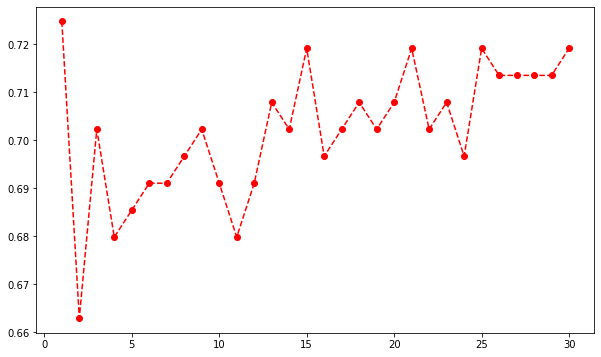

In [28]:
plt.figure(figsize=(10,6))
plt.plot(k_list,scores,color='red',linestyle='dashed',marker='o')

### Visualizando as fronteiras de complexidade

#### Selecionando os dados

In [0]:
X = wine.data[:,[0,2]]
y = wine.target

#### Função para plot de fronteiras de acordo com o número de vizinhos

In [0]:
def plot_fronteiras(n_vizinhos):
    knn = KNeighborsClassifier(n_neighbors=n_vizinhos)
    knn.fit(X, y)
    plt.figure(figsize=(8,5))
    plot_decision_regions(X,y,clf=knn,legend=2)
    plt.xlabel('alcohol')
    plt.ylabel('malic_acid')
    plt.title('Fronteiras de Complexidade - KNN')

#### Valor de K = 1

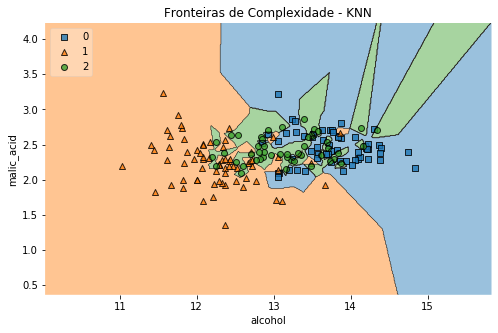

In [39]:
plot_fronteiras(1)

#### Valor de K = 3

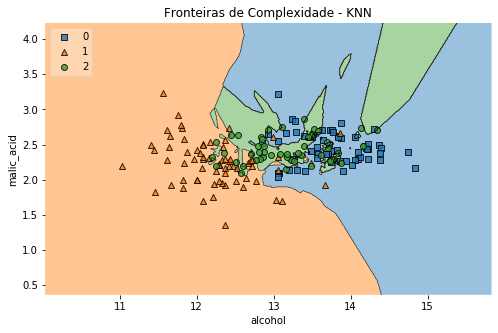

In [32]:
plot_fronteiras(3)

#### Valor de K = 7

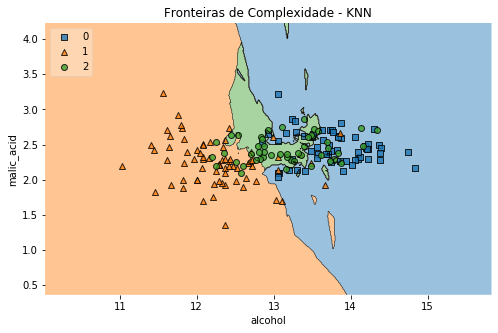

In [33]:
plot_fronteiras(7)

#### Valor de K = 30

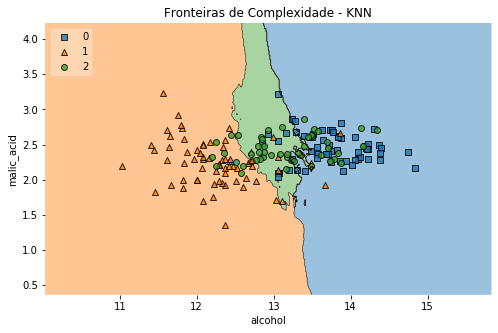

In [34]:
plot_fronteiras(30)

#### Valor de K = Número total de amostras

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)


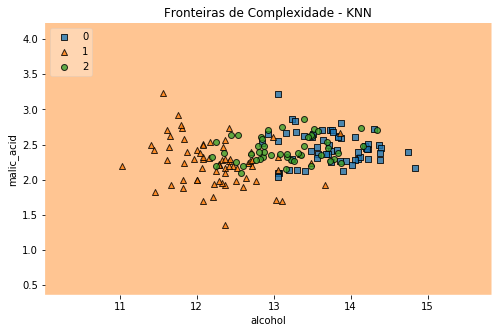

In [35]:
plot_fronteiras(178)